## 손실함수 계산 

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
torch.manual_seed(1)

In [4]:
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
t_train=torch.FloatTensor(t_data)
print(x_train.size())
print(t_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [11]:
model=nn.Sequential(
    nn.Linear(2,1), #input_dim=2, output_dim=1
    nn.Sigmoid()    #출력은 시그모이드 함수를 거침
)

In [12]:
model(x_train)

tensor([[0.3600],
        [0.2872],
        [0.6801],
        [0.4389],
        [0.5216],
        [0.7473]], grad_fn=<SigmoidBackward0>)

In [13]:
optimizer=optim.SGD(model.parameters(), lr=0.1)
nb_epochs=10000
costs=[]
accuracy_list=[]

In [14]:
for epoch in range(nb_epochs+1):
    hypothesis=model(x_train)   # H(x) 계산

    cost=F.binary_cross_entropy(hypothesis, t_train)
    # cost=-(t_train*torch.log(h) + (1-t_train)*torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch%100==0:
        prediction= hypothesis >= torch.FloatTensor([0.5])  #예측값이 0.5이 넘으면 True로 간주
        correct_prediction = prediction.float() == t_train  #실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item()/ len(correct_prediction)     #정확도를 계산
        
        print('Epoch:',epoch, 'Cost:',cost.item(), "accuracy:", accuracy)

Epoch: 0 Cost: 0.6149943470954895 accuracy: 0.6666666666666666
Epoch: 100 Cost: 0.4551481008529663 accuracy: 0.8333333333333334
Epoch: 200 Cost: 0.38301214575767517 accuracy: 0.8333333333333334
Epoch: 300 Cost: 0.327485054731369 accuracy: 0.8333333333333334
Epoch: 400 Cost: 0.2841247022151947 accuracy: 0.8333333333333334
Epoch: 500 Cost: 0.24992986023426056 accuracy: 1.0
Epoch: 600 Cost: 0.22259187698364258 accuracy: 1.0
Epoch: 700 Cost: 0.2004033774137497 accuracy: 1.0
Epoch: 800 Cost: 0.18212342262268066 accuracy: 1.0
Epoch: 900 Cost: 0.16685110330581665 accuracy: 1.0
Epoch: 1000 Cost: 0.15392734110355377 accuracy: 1.0
Epoch: 1100 Cost: 0.14286403357982635 accuracy: 1.0
Epoch: 1200 Cost: 0.13329477608203888 accuracy: 1.0
Epoch: 1300 Cost: 0.12494060397148132 accuracy: 1.0
Epoch: 1400 Cost: 0.11758670210838318 accuracy: 1.0
Epoch: 1500 Cost: 0.11106470227241516 accuracy: 1.0
Epoch: 1600 Cost: 0.10524168610572815 accuracy: 1.0
Epoch: 1700 Cost: 0.10001113265752792 accuracy: 1.0
Epoch: 

In [23]:
h2=model(x_train)
pred2=h2>=torch.FloatTensor([0.5])
pred2.float()

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [55]:
prediction=h2>=torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [17]:
print(W)
print(b)

NameError: name 'W' is not defined

In [18]:
import pandas as pd

<Axes: >

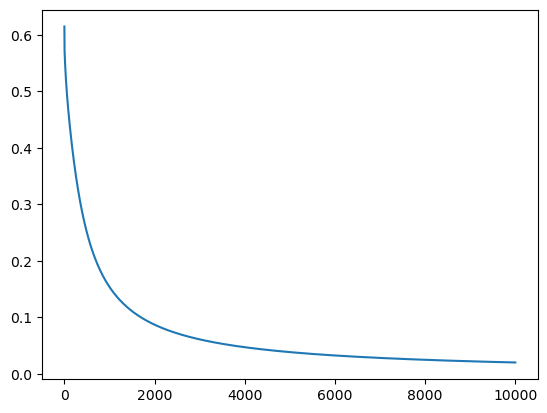

In [19]:
s1=pd.Series(costs)
s1.plot()

In [22]:
s2=pd.Series(accuracy_list)
plt.plot(s2)
plt.title("Accuracy")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11136\1841465591.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s2=pd.Series(accuracy_list)


NameError: name 'plt' is not defined